In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

### Preconditionning std Laplacian with q=0.001

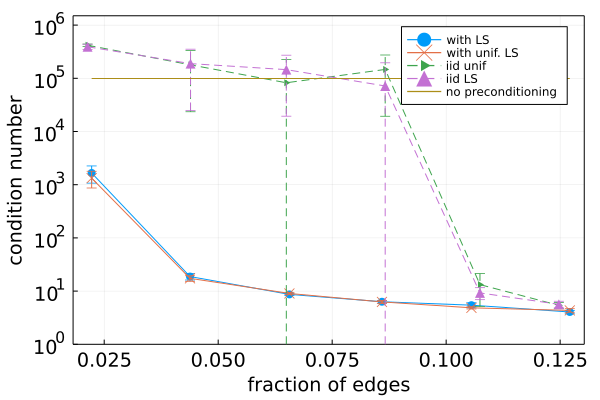

In [3]:
n = 100
p = 0.9
eta = 0.

rng = Random.default_rng()

meta_g = gen_graph_mun(rng, n, p, eta)

for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.001
n_tot = 6
n_rep = 3

D = cond_numbers(meta_g,q,n_tot,n_rep,rng)


x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,xlabel = "fraction of edges", yaxis=:log,labels = "DPP unif",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er, yaxis=:log,labels = "DPP LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er, yaxis=:log,labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er, yaxis=:log,labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box,margins = 0.1*2Plots.cm)
ylims!((1e0,1.5*1e6))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])



In [4]:

plot(D["percent_edges"],D["cnd_number"],yerror=D["cnd_number_std"], yaxis=:log,xlabel = "fraction of edges",labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

plot!(D["percent_edges"],D["cnd_number_no_lev"],yerror=D["cnd_number_no_lev_std"], yaxis=:log,labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

plot!(D["percent_edges_iid"],D["cnd_number_iid_unif"],yerror=D["cnd_number_iid_unif_std"], yaxis=:log,labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

plot!(D["percent_edges_iid"],D["cnd_number_iid_lev"],yerror=D["cnd_number_iid_lev_std"], yaxis=:log,labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)


plot!(D["percent_edges"],cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box,margins = 0.1*2Plots.cm)
ylims!((1e0,1.5*1e6))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])


foldername = "figures/"
type = "precond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

### Preconditionning std Laplacian with q=0.1

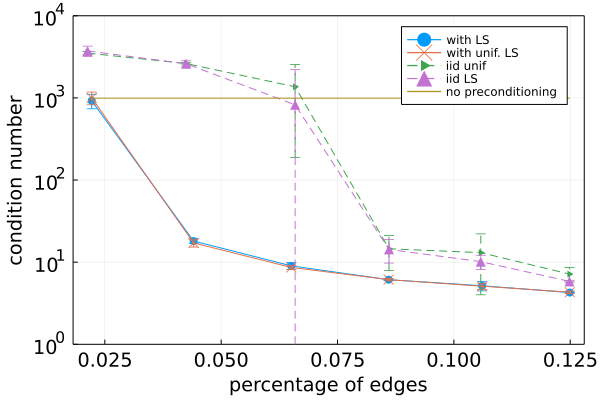

In [5]:

n = 100
p = 0.9
eta = 0.

mm = Length(:mm, 1)

rng = Random.default_rng();
meta_g = gen_graph_mun(rng, n, p, eta);
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.1

D = cond_numbers(meta_g,q,n_tot,n_rep,rng);


plot(D["percent_edges"],D["cnd_number"],yerror=D["cnd_number_std"], yaxis=:log,xlabel = "percentage edges",labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

plot!(D["percent_edges"],D["cnd_number_no_lev"],yerror=D["cnd_number_no_lev_std"], yaxis=:log,xlabel = "percentage edges",labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

plot!(D["percent_edges_iid"],D["cnd_number_iid_unif"],yerror=D["cnd_number_iid_unif_std"], yaxis=:log,xlabel = "percentage edges",labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

plot!(D["percent_edges_iid"],D["cnd_number_iid_lev"],yerror=D["cnd_number_iid_lev_std"], yaxis=:log,xlabel = "percentage of edges",labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)


plot!(D["percent_edges"],cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box,margins = 0.1*2Plots.cm)
ylims!((1e0,1e4))

In [6]:
plot(D["percent_edges"],D["cnd_number"],yerror=D["cnd_number_std"], yaxis=:log,xlabel = "percentage edges",labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

plot!(D["percent_edges"],D["cnd_number_no_lev"],yerror=D["cnd_number_no_lev_std"], yaxis=:log,xlabel = "percentage edges",labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

plot!(D["percent_edges_iid"],D["cnd_number_iid_unif"],yerror=D["cnd_number_iid_unif_std"], yaxis=:log,xlabel = "percentage edges",labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

plot!(D["percent_edges_iid"],D["cnd_number_iid_lev"],yerror=D["cnd_number_iid_lev_std"], yaxis=:log,xlabel = "percentage of edges",labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)


plot!(D["percent_edges"],cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box,margins = 0.1*2Plots.cm)
ylims!((1e0,1e4))

foldername = "figures/"
type = "precond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

## Same graph but with non-trivial bundle

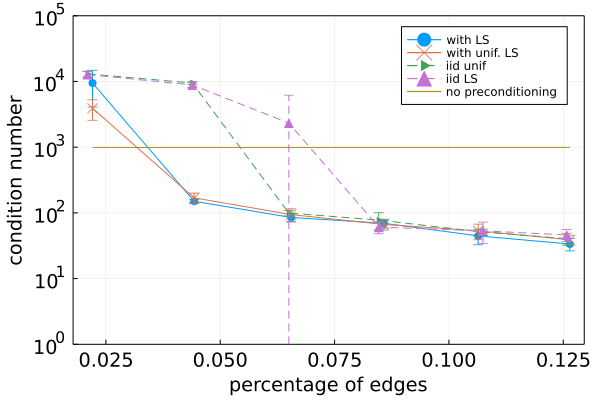

In [7]:
n = 100
p = 0.9
eta = 0.1

rng = Random.default_rng();
meta_g = gen_graph_mun(rng, n, p, eta);

q = 0.1;

D = cond_numbers(meta_g,q,n_tot,n_rep,rng);

plot(D["percent_edges"],D["cnd_number"],yerror=D["cnd_number_std"], yaxis=:log,xlabel = "percentage edges",labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

plot!(D["percent_edges"],D["cnd_number_no_lev"],yerror=D["cnd_number_no_lev_std"], yaxis=:log,xlabel = "percentage edges",labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

plot!(D["percent_edges_iid"],D["cnd_number_iid_unif"],yerror=D["cnd_number_iid_unif_std"], yaxis=:log,xlabel = "percentage edges",labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

plot!(D["percent_edges_iid"],D["cnd_number_iid_lev"],yerror=D["cnd_number_iid_lev_std"], yaxis=:log,xlabel = "percentage of edges",labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)


plot!(D["percent_edges"],cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box,margins = 0.1*2Plots.cm)
ylims!((1,1e5))
#foldername = "figures/"
#type = "precond"
#name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
#savefig(foldername*name)

In [8]:
plot(D["percent_edges"],D["cnd_number"],yerror=D["cnd_number_std"], yaxis=:log,xlabel = "percentage edges",labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

plot!(D["percent_edges"],D["cnd_number_no_lev"],yerror=D["cnd_number_no_lev_std"], yaxis=:log,xlabel = "percentage edges",labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

plot!(D["percent_edges_iid"],D["cnd_number_iid_unif"],yerror=D["cnd_number_iid_unif_std"], yaxis=:log,xlabel = "percentage edges",labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

plot!(D["percent_edges_iid"],D["cnd_number_iid_lev"],yerror=D["cnd_number_iid_lev_std"], yaxis=:log,xlabel = "percentage of edges",labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)


plot!(D["percent_edges"],cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box,margins = 0.1*2Plots.cm)
ylims!((1e0,1e5))

foldername = "figures/"
type = "precond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

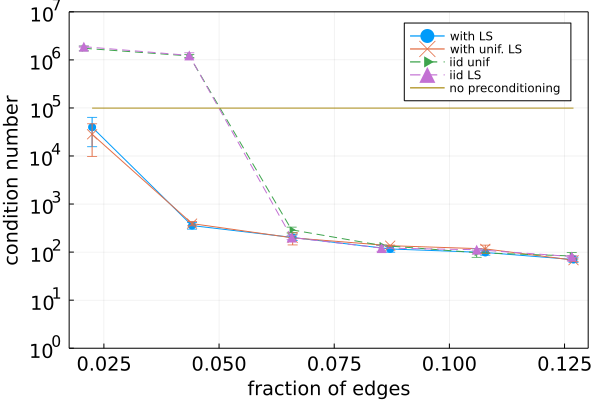

In [9]:

n = 100
p = 0.9
eta = 0.1

rng = Random.default_rng();
meta_g = gen_graph_mun(rng, n, p, eta);

q = 0.001;
D = cond_numbers(meta_g,q,n_tot,n_rep,rng);

plot(D["percent_edges"],D["cnd_number"],yerror=D["cnd_number_std"], yaxis=:log,labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

plot!(D["percent_edges"],D["cnd_number_no_lev"],yerror=D["cnd_number_no_lev_std"], yaxis=:log,labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

plot!(D["percent_edges_iid"],D["cnd_number_iid_unif"],yerror=D["cnd_number_iid_unif_std"], yaxis=:log,labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

plot!(D["percent_edges_iid"],D["cnd_number_iid_lev"],yerror=D["cnd_number_iid_lev_std"], yaxis=:log,xlabel = "fraction of edges",labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)


plot!(D["percent_edges"],cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box)
ylims!((1,1e7))

#foldername = "figures/"
#type = "precond"
#name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
#savefig(foldername*name)

In [10]:
plot(D["percent_edges"],D["cnd_number"],yerror=D["cnd_number_std"], yaxis=:log,labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

plot!(D["percent_edges"],D["cnd_number_no_lev"],yerror=D["cnd_number_no_lev_std"], yaxis=:log,labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

plot!(D["percent_edges_iid"],D["cnd_number_iid_unif"],yerror=D["cnd_number_iid_unif_std"], yaxis=:log,labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

plot!(D["percent_edges_iid"],D["cnd_number_iid_lev"],yerror=D["cnd_number_iid_lev_std"], yaxis=:log,xlabel = "fraction of edges",labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)


plot!(D["percent_edges"],cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box)
ylims!((1,1e7))

foldername = "figures/"
type = "precond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

In [11]:
n = 100
p = 0.9
eta = 0.1

rng = Random.default_rng();
meta_g = gen_graph_mun(rng, n, p, eta);

In [12]:
q = 0.1;
cnd_number,cnd_number_no_lev,sp_L,sp_L_nl,percent_edges,cnd_number_std,cnd_number_no_lev_std,sp_L_std,sp_L_nl_std,percent_edges_std = cond_numbers(meta_g,q,n_tot,n_rep,rng)

plot(1:n_tot,cnd_number,yerror=cnd_number_std, yaxis=:log,xlabel = "batch size",labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 3)
plot!(1:n_tot,cnd_number_no_lev,yerror=cnd_number_no_lev_std, yaxis=:log,xlabel = "batch size",labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 3)
plot!(1:n_tot,percent_edges,yerror=percent_edges_std,labels = "percentage of edges",markerstrokecolor=:auto,markershape=:cross,markersize = 3)
plot!(1:n_tot,cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number")

ErrorException: Cannot convert Pair{String, Matrix{Float64}} to series data for plotting

### SBM

In [13]:

c = [50 10;
10 50]
n = [100 ; 100]
g =  stochastic_block_model(c, n)


meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.001;
cnd_number,cnd_number_no_lev,sp_L,sp_L_nl,percent_edges,cnd_number_std,cnd_number_no_lev_std,sp_L_std,sp_L_nl_std,percent_edges_std = cond_numbers(meta_g,q,n_tot,n_rep)

plot(1:n_tot,cnd_number,yerror=cnd_number_std, yaxis=:log,xlabel = "batch size",labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 3)
plot!(1:n_tot,cnd_number_no_lev,yerror=cnd_number_no_lev_std, yaxis=:log,xlabel = "batch size",labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 3)
plot!(1:n_tot,percent_edges,yerror=percent_edges_std,labels = "percentage of edges",markerstrokecolor=:auto,markershape=:cross,markersize = 3)
plot!(1:n_tot,cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number")
ylims!((1e-2,1e6))

foldername = "figures/"
type = "SBMprecond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

MethodError: MethodError: no method matching cond_numbers(::MetaGraph{Int64, Float64}, ::Float64, ::Int64, ::Int64)
Closest candidates are:
  cond_numbers(::Any, ::Any, ::Any, ::Any, !Matched::Any) at /Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/src/utils.jl:51

In [14]:

c = [50 10;
10 50]
n = [100 ; 100]
g =  stochastic_block_model(c, n)


meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.1;
cnd_number,cnd_number_no_lev,sp_L,sp_L_nl,percent_edges,cnd_number_std,cnd_number_no_lev_std,sp_L_std,sp_L_nl_std,percent_edges_std = cond_numbers(meta_g,q,n_tot,n_rep)

plot(1:n_tot,cnd_number,yerror=cnd_number_std, yaxis=:log,xlabel = "batch size",labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 3)
plot!(1:n_tot,cnd_number_no_lev,yerror=cnd_number_no_lev_std, yaxis=:log,xlabel = "batch size",labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 3)
plot!(1:n_tot,percent_edges,yerror=percent_edges_std,labels = "percentage of edges",markerstrokecolor=:auto,markershape=:cross,markersize = 3)
plot!(1:n_tot,cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number")
ylims!((1e-2,1e4))

MethodError: MethodError: no method matching cond_numbers(::MetaGraph{Int64, Float64}, ::Float64, ::Int64, ::Int64)
Closest candidates are:
  cond_numbers(::Any, ::Any, ::Any, ::Any, !Matched::Any) at /Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/src/utils.jl:51